In [1]:

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import os

In [2]:
# Update these paths
# ------------------------
train_dir = r"C:\Users\racha\Downloads\cifar-10-img\cifar-10-img\train"
test_dir  = r"C:\Users\racha\Downloads\cifar-10-img\cifar-10-img\test"

In [3]:
# Hyperparameters

IMG_SIZE = (32, 32)       # CIFAR-10 size
BATCH = 128
EPOCHS = 10               # reduce for quick exam runs
LR = 0.01
MOM = 0.9
NUM_CLASSES = 10

In [4]:
# Basic checks

if not os.path.isdir(train_dir):
    raise FileNotFoundError(f"train_dir not found: {train_dir}")
if not os.path.isdir(test_dir):
    raise FileNotFoundError(f"test_dir not found: {test_dir}")

In [5]:
# Load datasets from local folders

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH,
    label_mode='int',
    shuffle=True,
    seed=123
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH,
    label_mode='int',
    shuffle=False
)

Found 40079 files belonging to 10 classes.
Found 9921 files belonging to 10 classes.


In [6]:
# Normalize (scale 0..1)

normalizer = layers.Rescaling(1.0 / 255.0)
train_ds = train_ds.map(lambda x, y: (normalizer(x), y))
test_ds = test_ds.map(lambda x, y: (normalizer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

In [7]:
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),  # RGB images
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile with SGD
# ------------------------
sgd = optimizers.SGD(learning_rate=LR, momentum=MOM)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
# Train
# ------------------------
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=test_ds
)

Epoch 1/10
314/314 [==============================] - 146s 450ms/step - loss: 1.8753 - accuracy: 0.3223 - val_loss: 1.7474 - val_accuracy: 0.3723
Epoch 2/10
314/314 [==============================] - 120s 375ms/step - loss: 1.6783 - accuracy: 0.4040 - val_loss: 1.6689 - val_accuracy: 0.4076
Epoch 3/10
314/314 [==============================] - 130s 403ms/step - loss: 1.6076 - accuracy: 0.4293 - val_loss: 1.6208 - val_accuracy: 0.4082
Epoch 4/10
314/314 [==============================] - 133s 416ms/step - loss: 1.5353 - accuracy: 0.4546 - val_loss: 1.5724 - val_accuracy: 0.4397
Epoch 5/10
314/314 [==============================] - 124s 386ms/step - loss: 1.4979 - accuracy: 0.4654 - val_loss: 1.5628 - val_accuracy: 0.4517
Epoch 6/10
314/314 [==============================] - 137s 428ms/step - loss: 1.4562 - accuracy: 0.4820 - val_loss: 1.5722 - val_accuracy: 0.4419
Epoch 7/10
314/314 [==============================] - 141s 439ms/step - loss: 1.4256 - accuracy: 0.4937 - val_loss: 1.5087 -

In [10]:
# Evaluate
# ------------------------
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

78/78 [==============================] - 20s 246ms/step - loss: 1.4621 - accuracy: 0.4840
Test loss: 1.4621
Test accuracy: 0.4840


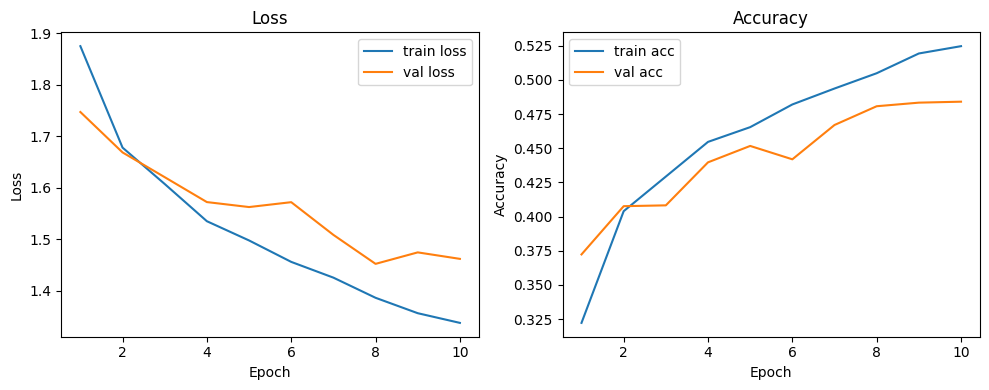

In [11]:
# Plot loss and accuracy
# ------------------------
def plot_history(history):
    h = history.history
    epochs = range(1, len(h['loss']) + 1)

    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.plot(epochs, h['loss'], label='train loss')
    if 'val_loss' in h:
        plt.plot(epochs, h['val_loss'], label='val loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.title('Loss')

    plt.subplot(1,2,2)
    plt.plot(epochs, h['accuracy'], label='train acc')
    if 'val_accuracy' in h:
        plt.plot(epochs, h['val_accuracy'], label='val acc')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.title('Accuracy')

    plt.tight_layout()
    plt.show()

plot_history(history)

In [ ]:
# Save model if needed
# ------------------------
#model.save("ffnn_cifar10_local.h5")
#print("Model saved to ffnn_cifar10_local.h5")